# Overview

- Recurrent Neural Network
 - Recurrent Layer 
 - Forecasting with an RNN
 - Back-Propogation Through Time (BPTT)

# Recurrent Neural Network (RNN)

RNN is a neural network which contains Recurrent Layers. A Recurrent Layer is a layer which can sequentially process sequence of inputs. RNNs can take all sorts of sequences as inputs, like, sentences. In this course we will be using them to process Time Series. 

Applications -> Sentiment Analysis, Speech Recognition, Time Series Predictions, Natural Language Processing, and Gesture Recognition.

the full input shape is three-dimensional:
- The first dimension is the batch size,
- the second dimension represents the time steps,
- #dims represents the dimentions of the input. These can work with Multi-variate Time Series. For univariate #dims = 1



A recurrent layer is composed of a single memory cell, which is used repeatedly to compute the outputs. A memory cell is basically a small neural network. It can be a simple dense layer or a complex memory cell such as an LSTM cell or JRU cell. 

It's important to understand that a recurrent layer only contains a single cell. In this diagram, you see multiple cells, but it's actually the same cell that is reused multiple times by the layer. At each time step, the memory cell takes the value of the input sequence at that time step, starting with X_0, then X_1, and so on, and it produces the **output for the current time step,** starting with Y hat 0, then Y hat 1, and so on.

But the memory cell also produces another output at each time step called **a state vector**, or sometimes **a context vector**, starting with H_0, then H_1, and so on. As you can see, this state vector is fed as an additional input to the memory cell at the next time step. This is actually why this is called a recurrent layer.

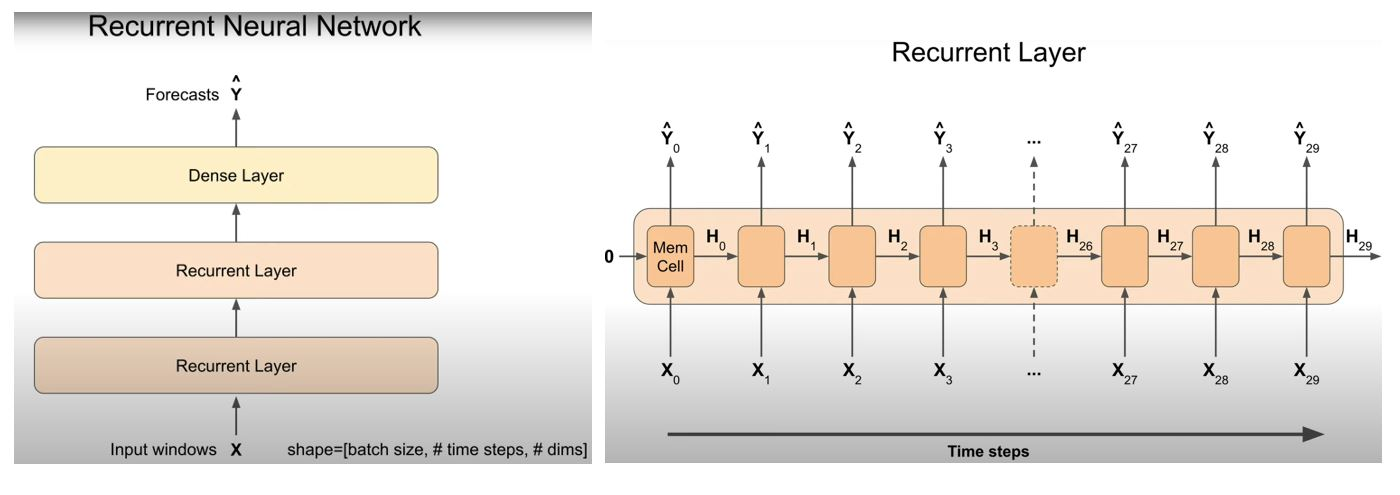

## Recurrent layer 

lets say, 
- batch size = 4 (a batch of four windows from a time series,)
- window size = 30 
- #dims = 1 (univariate)
so, the shape is 4 times 30 times 1.

At each time step the memory cell takes a 4 by 1 matrix as input, along with the state matrix from the previous time step. Now, let's suppose the memory cell is composed of just three neurons, also called units.
- Memory cell has 3 neurons (or units)

The output matrix at each time step will then be 4 by 3(because the batch size is four and the number of units is three.) Output layer will have 3 dimentions
- batch size, which is 4
- The second dimension is the number of steps, (30)
- output dimensionality (3, same as the number of neurons)


In a simple RNN, the memory cell is regular dense layer and the state matrix is just a copy of the output matrix.For example, H_0 is just a copy of Y_0, H_1 is just a copy of Y_1 and so on.

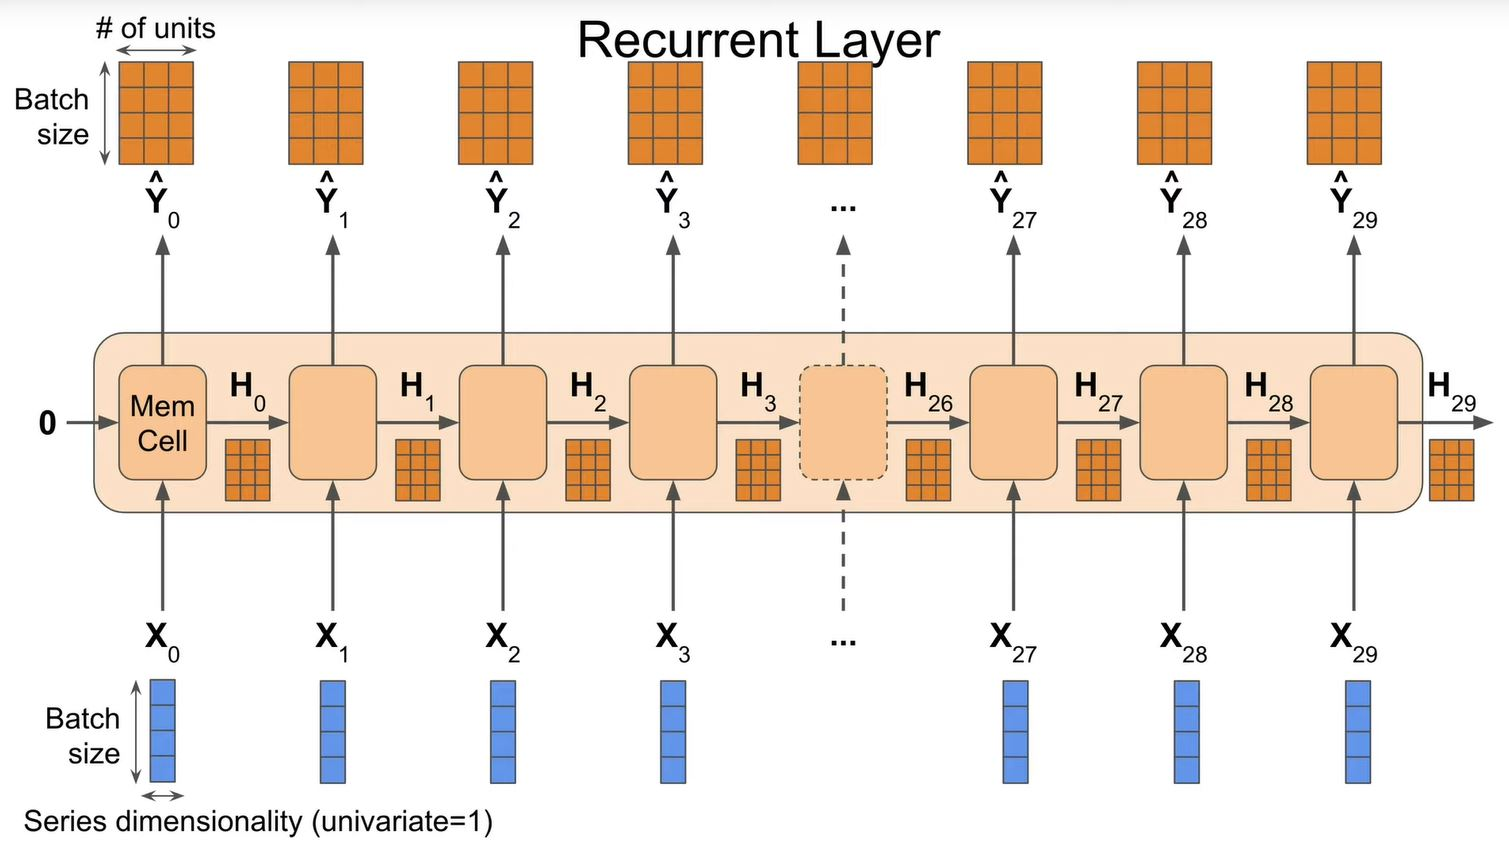



In some cases you want to input a sequence, but you don't want to output a sequence. You just want to output a single vector for each instance in the batch. This is called a sequence to vector RNN. It's quite simple. All you need to do is ignore all the outputs except for the last one. e.g. **Word2Vec**

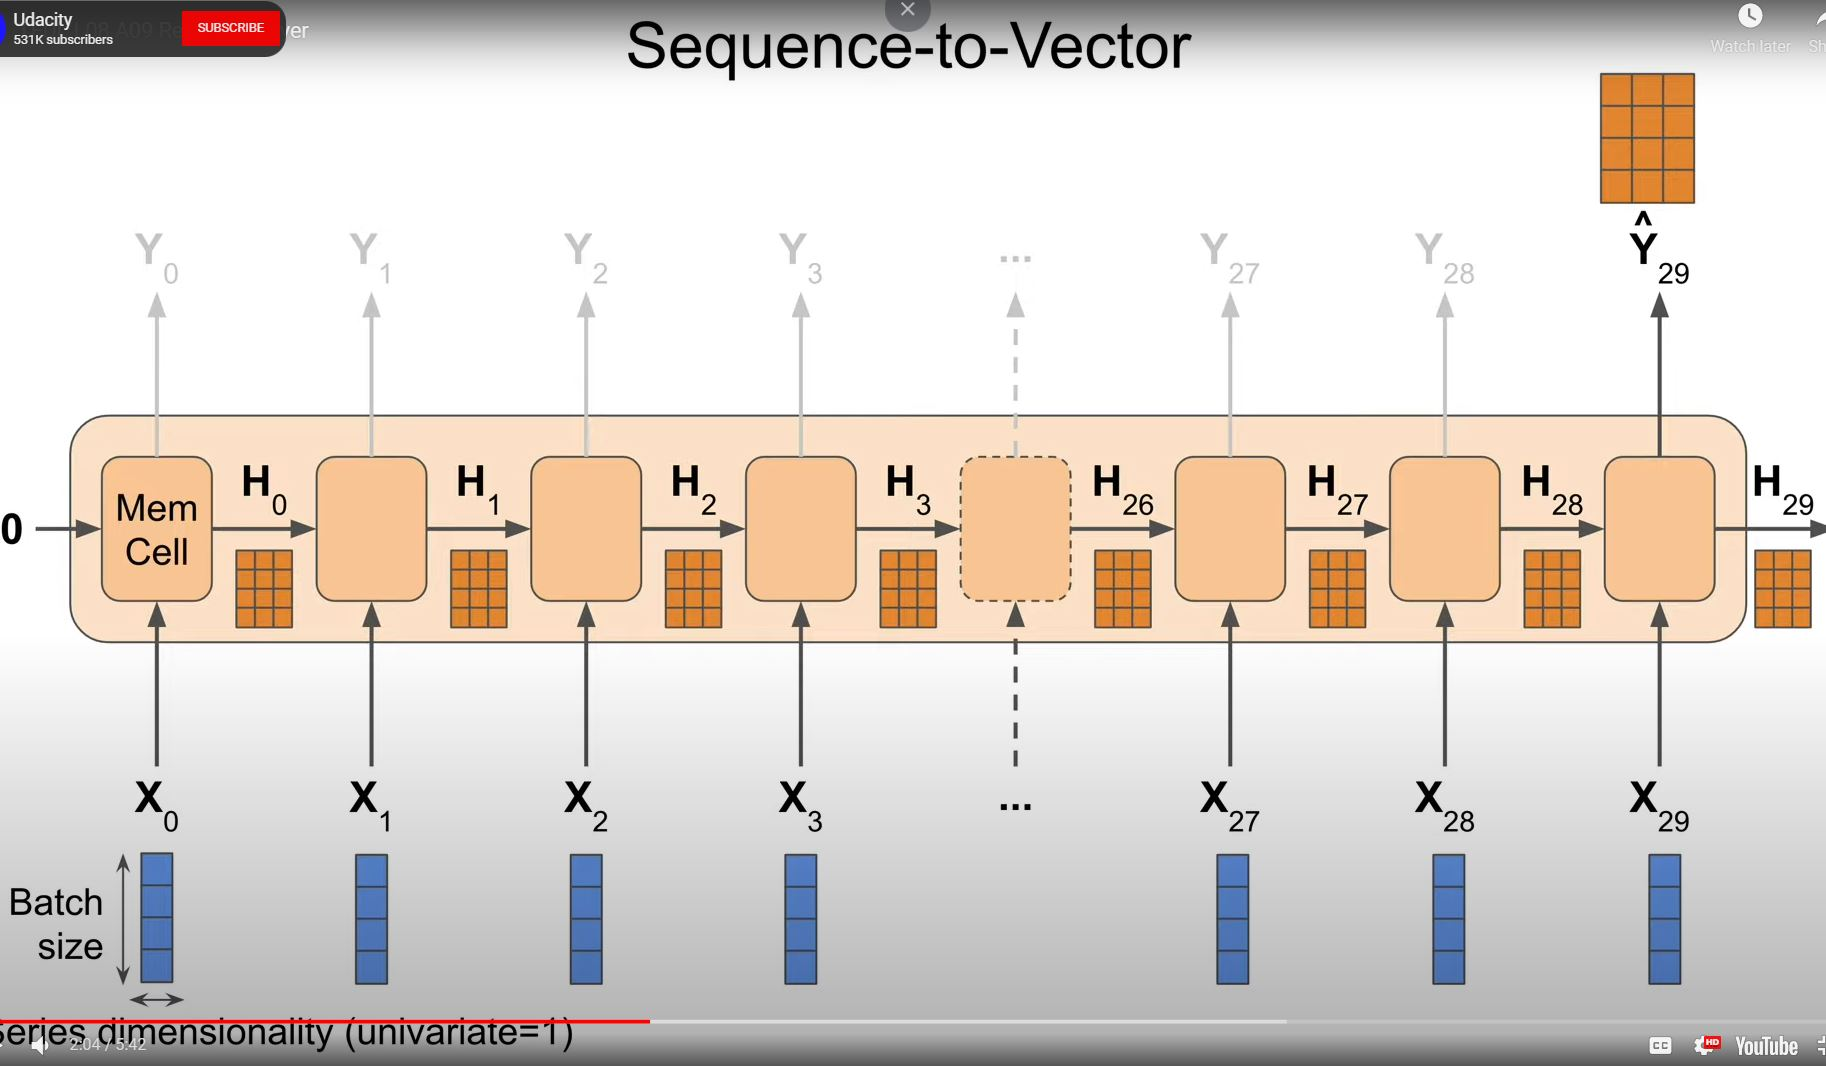

In fact, in Keras this is the default behavior of all recurrent layers. If you want a recurrent layer to output a sequence you have to set the argument return underscore sequences equals true when creating the layer. For example, this RNN contains two recurrent layers. The first layer has returned underscore sequences equals true, so it outputs a sequence which is then fed to the second recurrent layer.

But this recurrent layer does not have return underscore sequence is equals true, so it defaults to false and it only outputs the final time step. Since there are a 100 units in that second recurrent layer its outputs at each time step are a 100 dimensional, and in this case only the last output is sent to the next layer, which is a dense layer with a single neuron. This final output layer will output a single value for each instance in the batch.

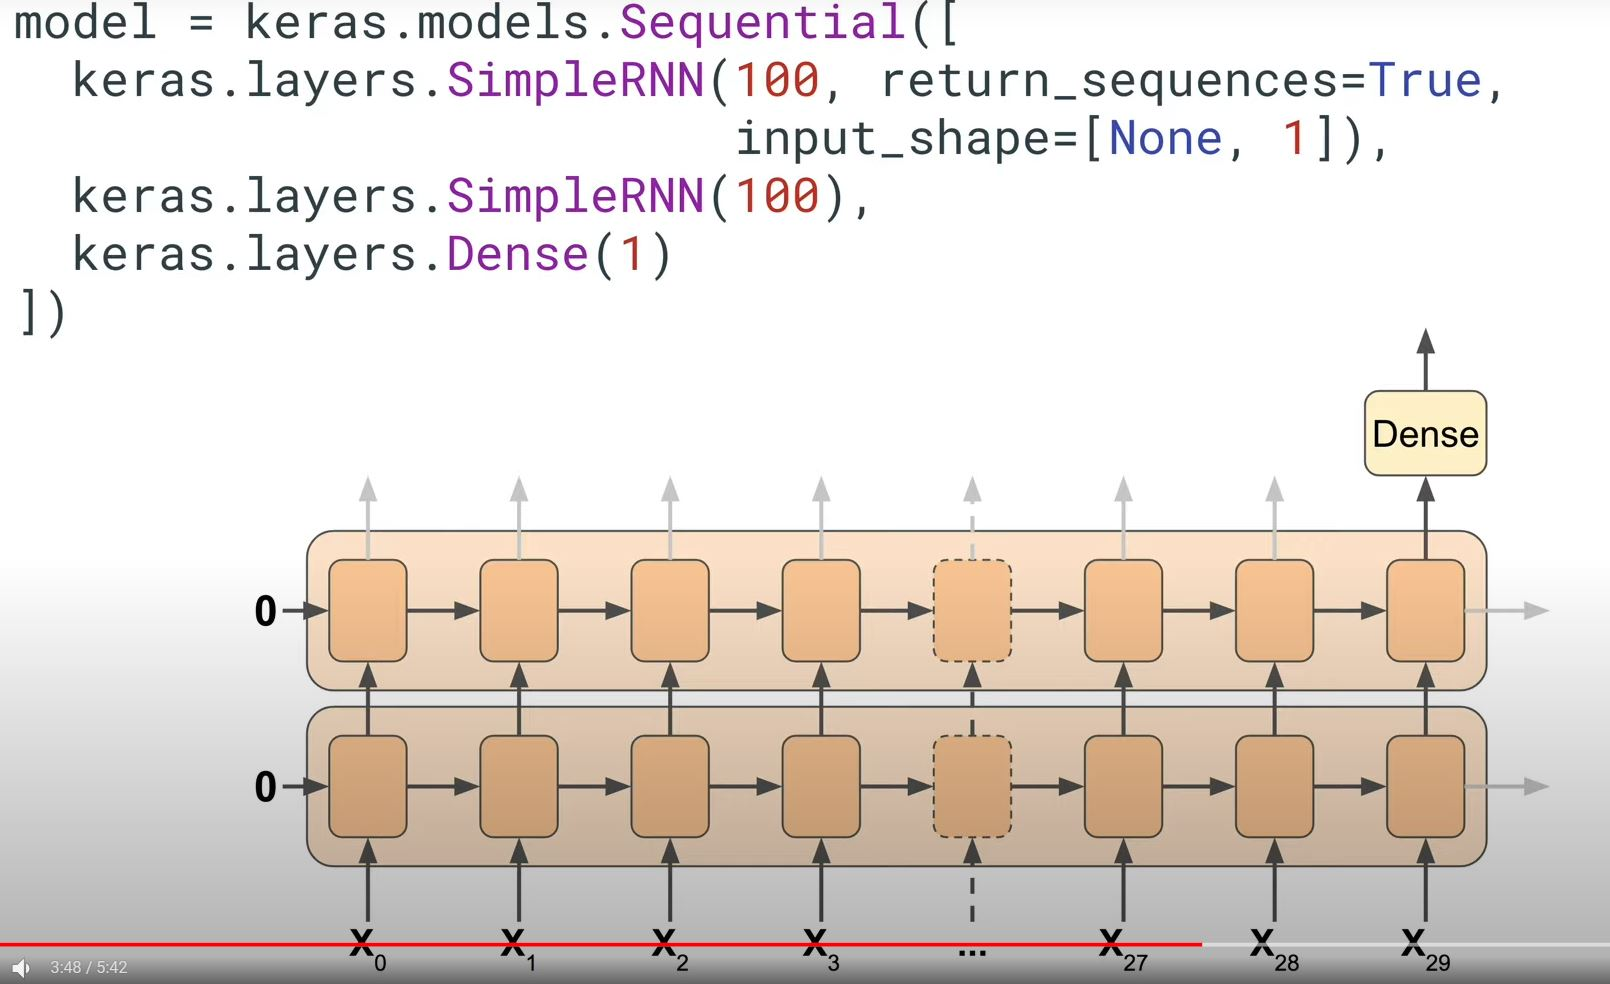




As I mentioned earlier, the input shape of the whole RNN is three-dimensional. 
- There's the batch size,
- the number of time steps,
- #dims - the dimensionality of the input sequence,(= 1 for univariate time series.)

But notice that the **input shape arguments of the first layer is none and one**. What does this mean?

Well, remember that Keras assumes that first dimension is the batch size and that it can have any size at all. Then the next dimension is the number of time steps, but we define it as none, which means that this RNN will handle sequences of any length, this is new. With regular dense layers you have to specify exactly how many features you will get as input for each instance. <br>
But with a recurrent layer since it just reuses the same memory cell at each time step, it can handle sequences of any length. Then the last dimension is one because once again we're dealing with a univariate time series.

Since we're using a simple RNN layer, it is based on the simple RNN cell class which behaves very much like a dense layer. At each time step it performs a weighted sum of it's inputs, which includes the inputs for that time step and the state from the previous time step. Then it applies an activation function, and that's about it.

Notice that we didn't specify the activation function, that's because it's defaults to 10H, the hyperbolic tangent function.


So you might wonder why don't we use the ReLu activation function instead. Well, the problem is RNNs have a tendency to have unstable gradients. The gradients can vanish during training or they can explode, especially if you're using a function like the ReLu activation function which is non saturating. In other words, it can grow arbitrarily large.

So by using the hyperbolic tangent, 10H function instead, it's a bit more stable since it will saturate. But you might still get vanishing gradients, so training maybe super slow. 

##### Setting return_sequence = True for the second layer

Now, if we set returns sequences equals true in all recurrent layers, then they will all output sequences, and thus the dense layer will get a sequence as input.

In that case, the way Keras handles this is that it actually applies the same dense layer independently at each time step. I represented the dense layer multiple times, but it's important to understand that it's the same dense layer which is used independently at each time step.

This gives a sequence to sequence RNN. You feed it a batch of sequences and it outputs a batch of sequences of the same length. In this case, we used a single unit in the output layer. So the output sequence will be univariate just like the input sequence. But the dimensionality of the output sequence will not always match the dimensionality of the input sequence, really depends on the task.

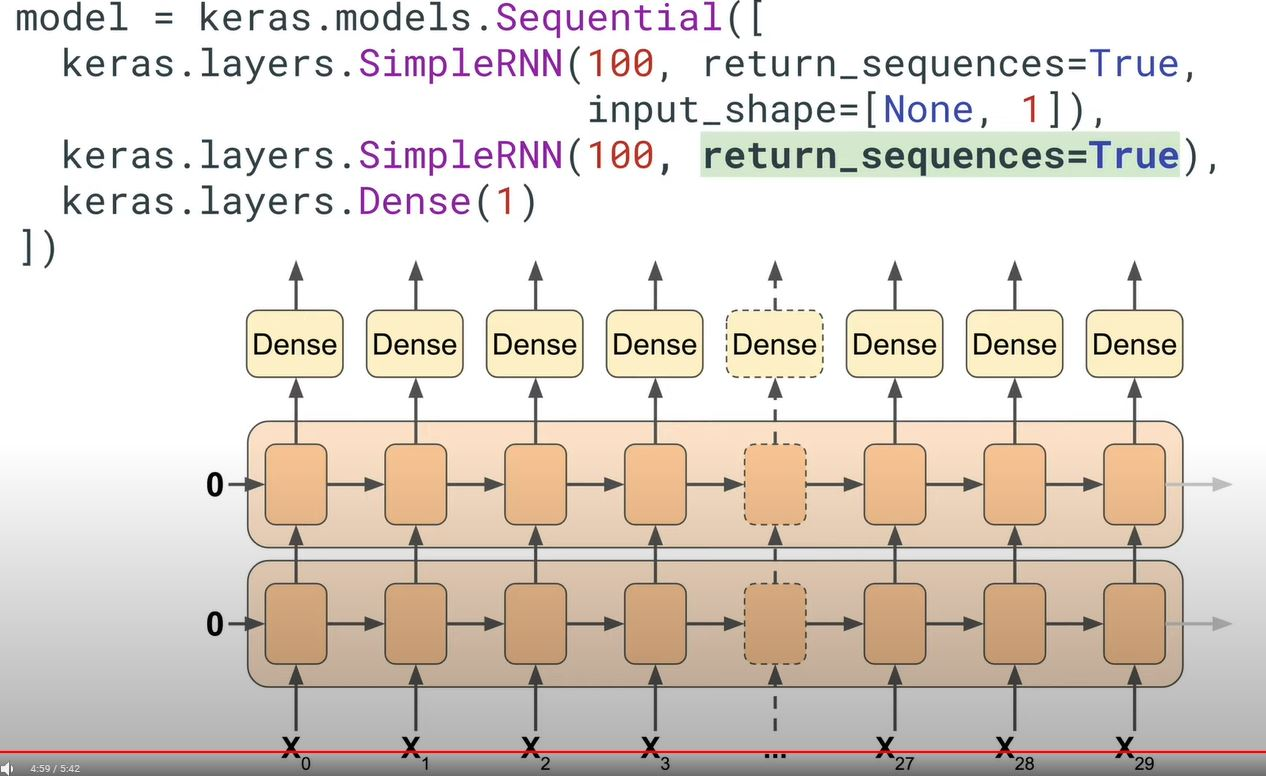

## Forecasting with an RNN

We're now ready to train our first RNN to forecast the same-time series as earlier. Now, all we need is an RNN that can take in a batch of time windows, and forecast the next value for each window in the batch, that's sequence to vector RNN.

So we can just use the model we looked at earlier, however, since our data set was built to return two-dimensional batches of windows, where the first dimension is the batch size and the second dimension is the number of time-steps, we need to add an extra dimension. 

Remember that an RNN expects 3D inputs: batch size, number of time-steps and series dimensionality, which is one in this case. We could go ahead and update our window data set function, but it's not too hard to make the model itself fix the shape of the inputs using a lambda layer that calls the tf dot expense dims to function, and adds an extra dimension at the end. 

Note that we define the input shape as none, meaning the model will support sequences of any length. We also scale the outputs by a factor of 200, this is useful since the time series has values ranging from 40 to a 160, but the recurrent layers use the hyperbolic tangent activation function as I explained earlier, which outputs values between -1 and 1. So scaling the outputs up by a factor of 200 will help training.

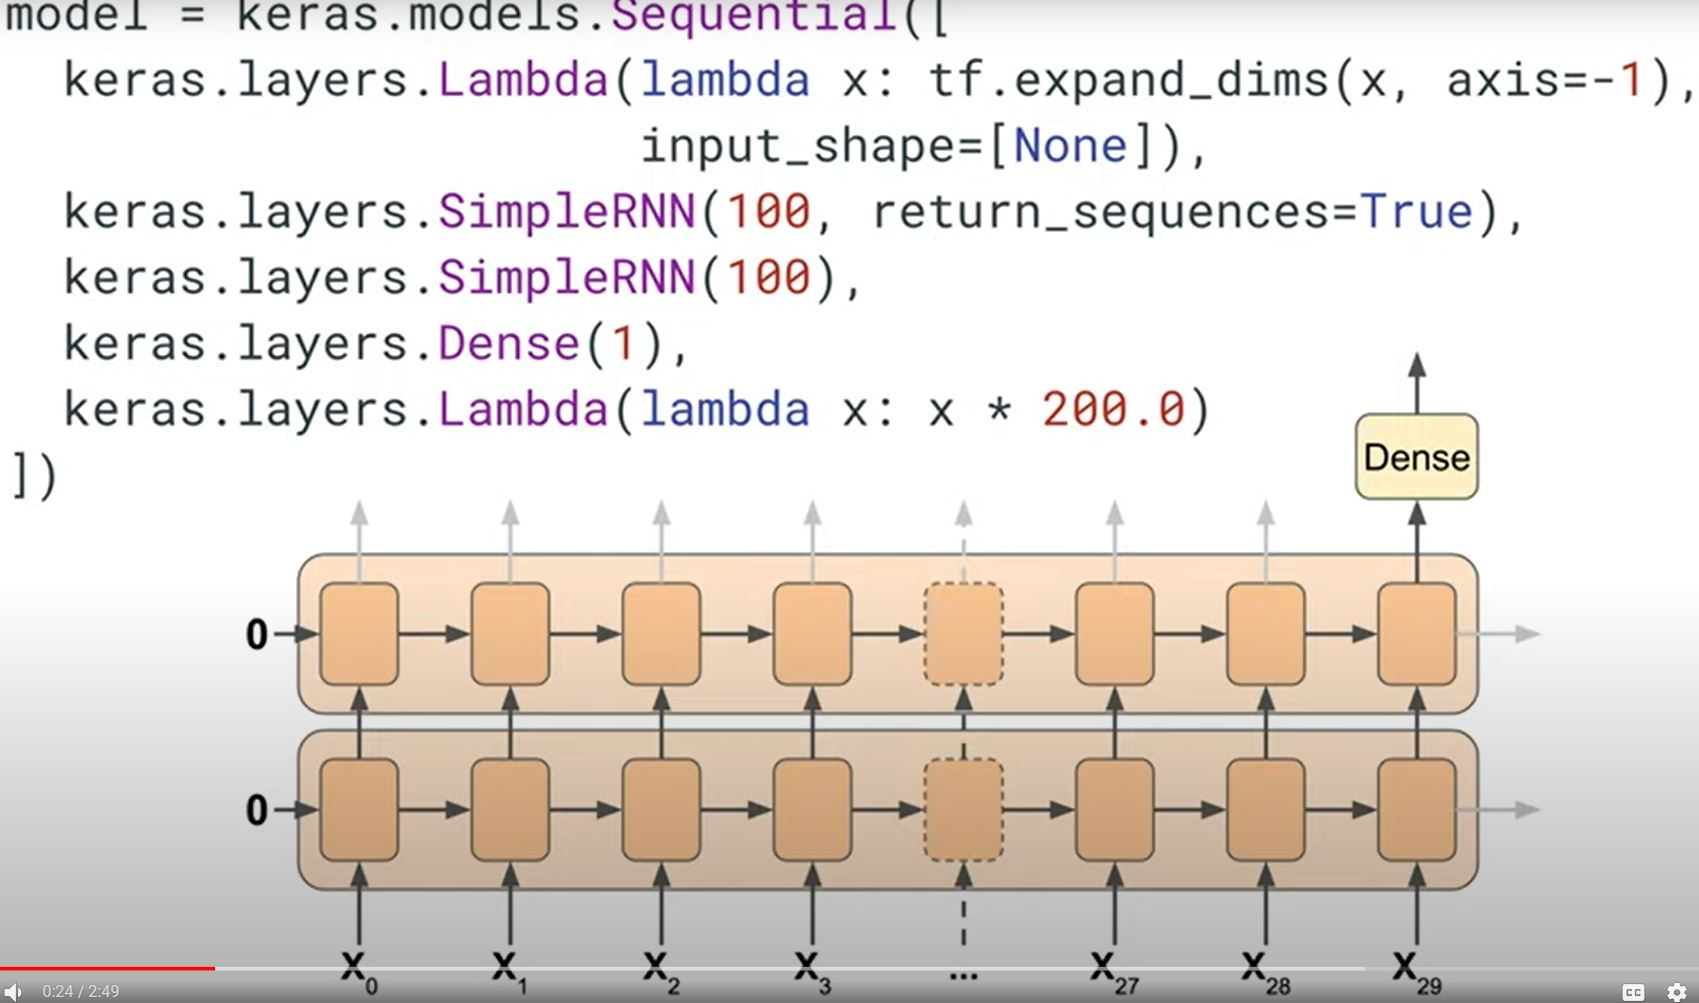

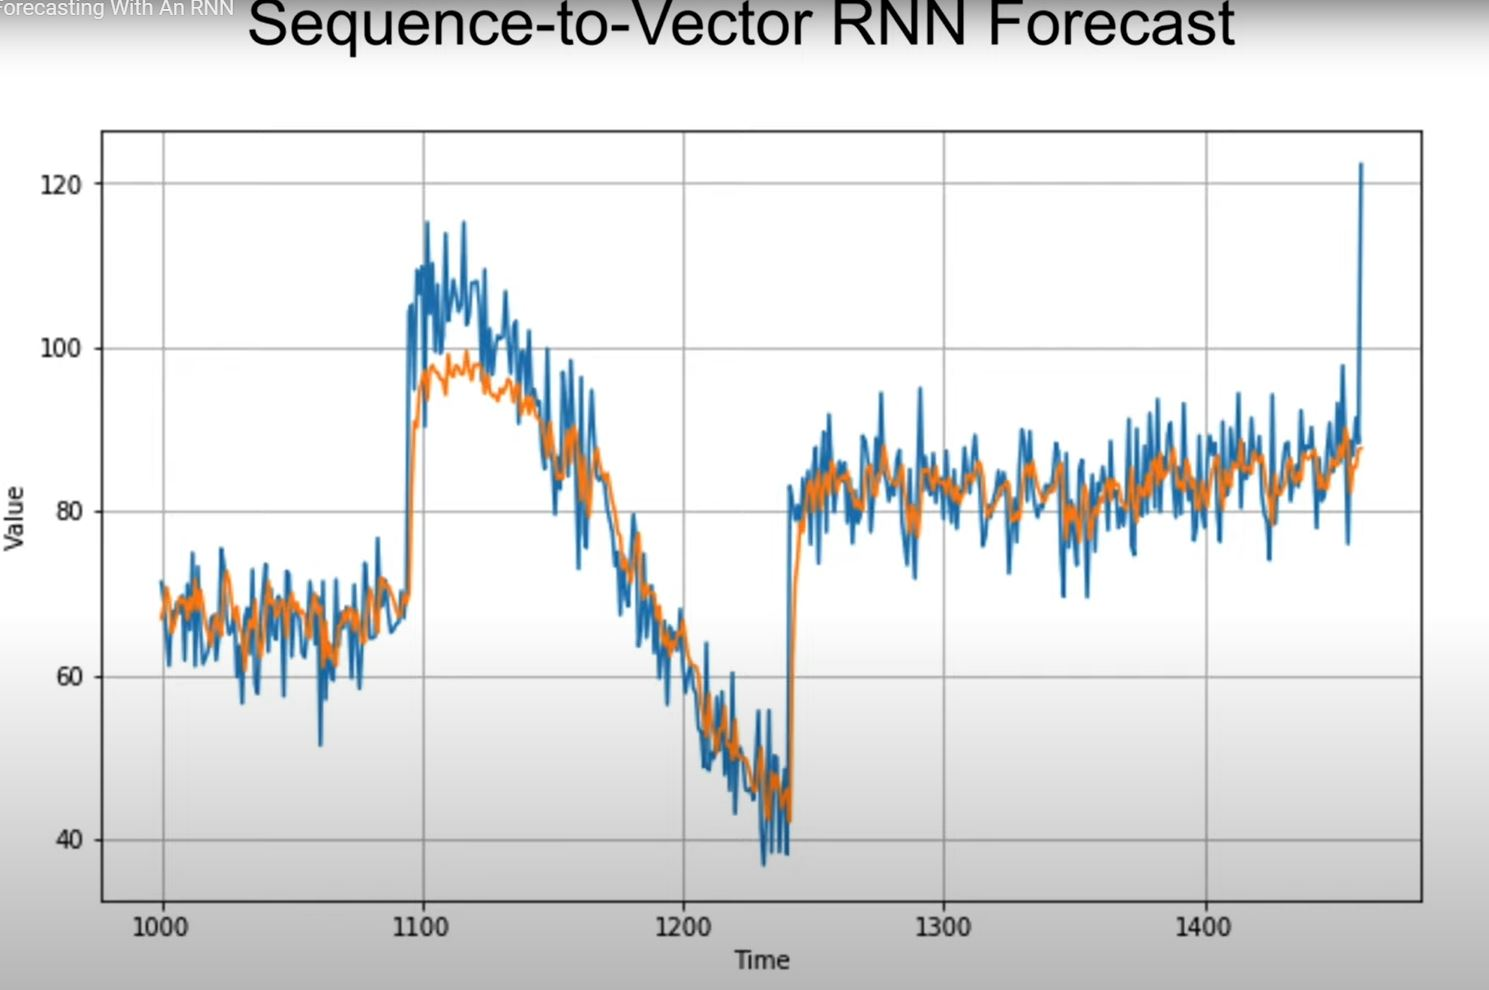

After training, this RNN we get these forecasts. (shown above) They're not quite as good as the forecast from our previous models. The mean absolute error is about 5.2, you can try to improve this model by fine tuning gets hyperparameters. For example, there are probably way too many neurons and perhaps a single recurrent layer would suffice. However, you will see that training in RNN is actually tricky, if you set the learning rate too high, training is unstable and the RNN doesn't learn, but if you set the learning rate low enough to avoid the instabilities, training is really slow.

Moreover, during training the Loss jumps up and down up unpredictably. So if you use early stopping, it may interrupt training too early. In this case, make sure you set the patient's parameter to a large enough value, however, this means that the final model will be long after the best model seen during training and may be much worse. 

So it's probably a good idea to save checkpoints every time the model improves and rollback to the best model at the end of training.

To do that, you can use the model checkpoint callback and say it's saved best only argument to true. At each epoch, this callback will save the model if it has the best validation performance seen so far. At the end of training, we can just load the last model saved and it will be the one with the lowest validation error.

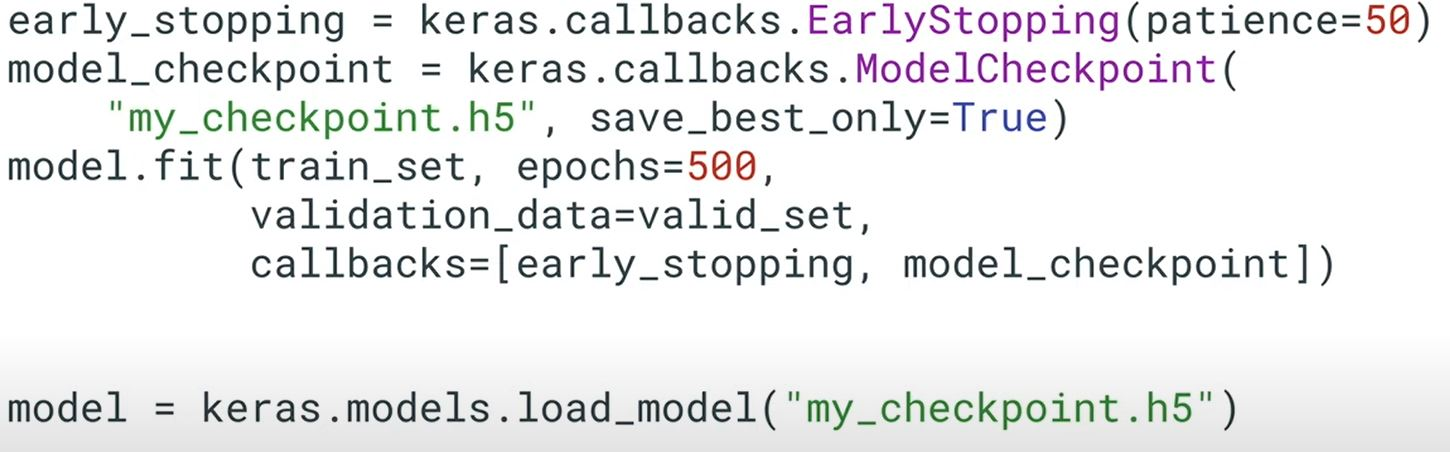

## Back Propogation Through Time (BPTT)

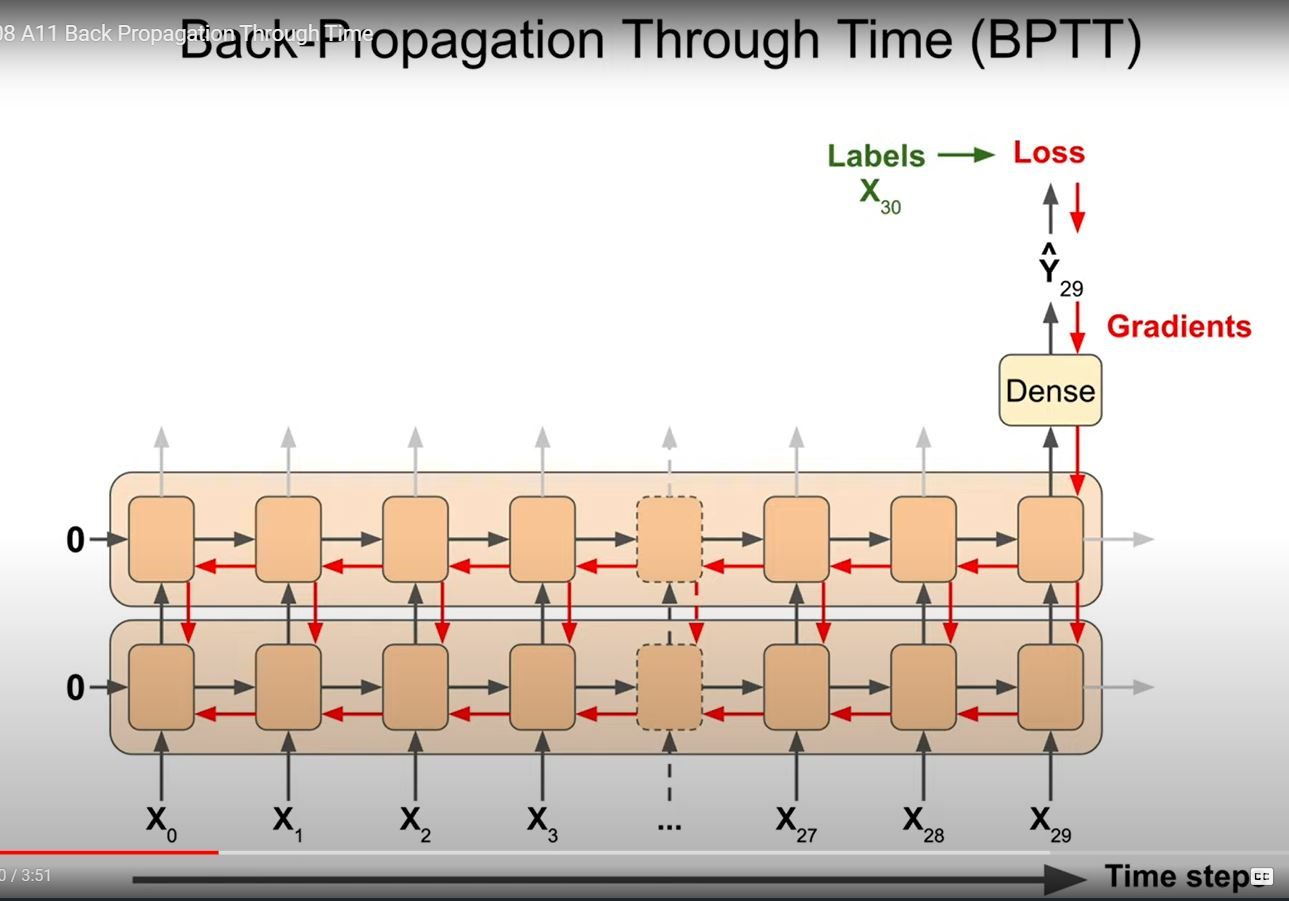

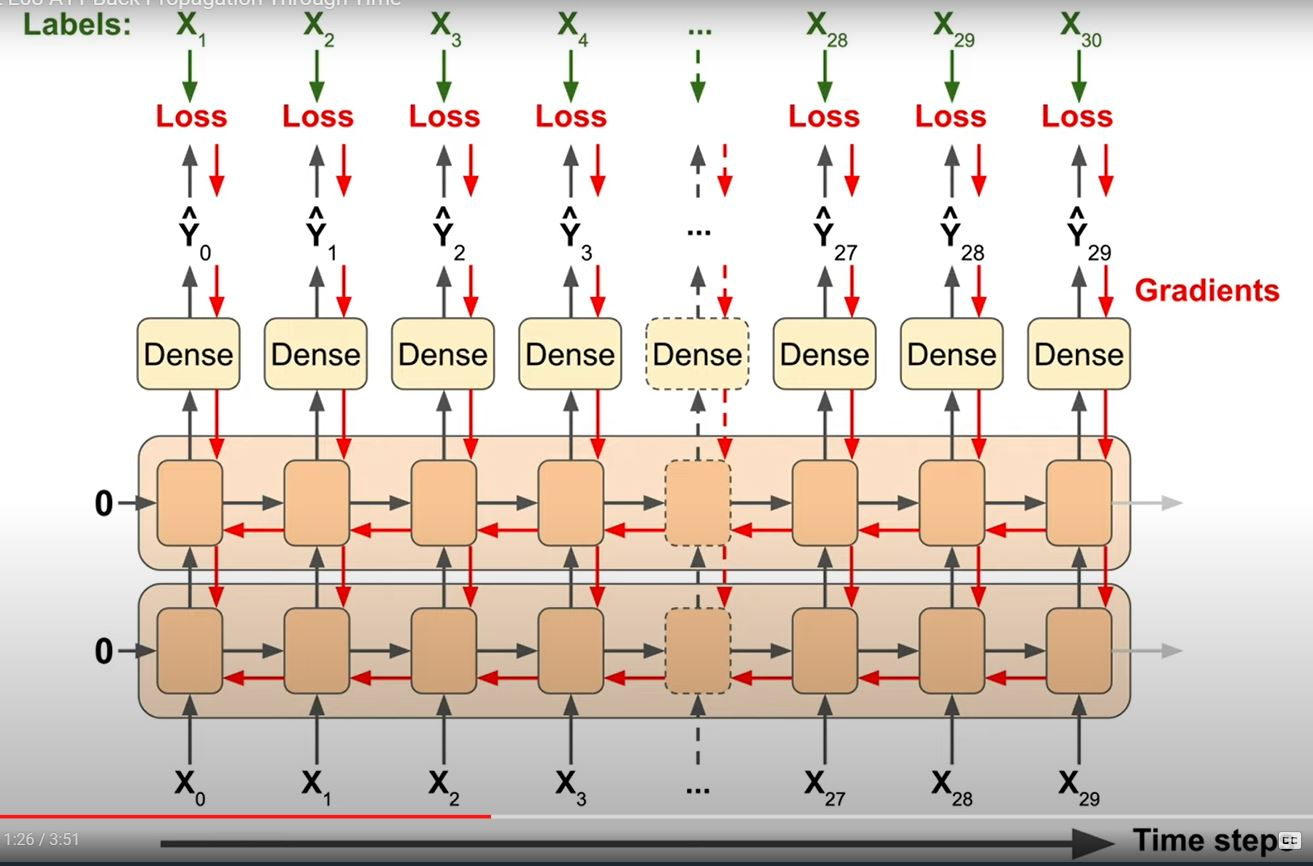

# Stateless RNN and Stateful RNNs


# Implementing a Stateful RNN